# Studying the Growth Factor

In [2]:
from importlib import reload
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pybolt
import bolt

In [57]:
reload(bolt)
reload(pybolt)
c = bolt.InitCosmo(0.7, 0.3)
c_py = pybolt.Cosmo(0.7, 0.3)
a_py, r_py = pybolt.integrate(c_py, 0.1)
a, r = bolt.integrate(c, 0.1).as_arrays()
with open("compare.txt", "w") as f:
    for a, p, p_py in zip(a_py, r, r_py):
        p_prime = bolt.dy_dloga(c, bolt.Perturbations.from_list(p), np.log(a), 0.1).as_np_array()
        p_prime_py = pybolt.dy_dloga(p_py, np.log(a), c_py, 0.1)
        for e, e_prime, e_py, e_prime_py in zip(p, p_prime, p_py, p_prime_py):
            f.write(f"{e} {e_py} ({e_prime}, {e_prime_py}) | ")
        f.write("\n")

In [14]:
# Transfer function example
reload(pybolt)
ks = [0.001, 0.01, 0.1, 2]
c = pybolt.Cosmo(h=0.7, Omega_m=0.3)
a, results = pybolt.solve_system_for_ks(c, ks)

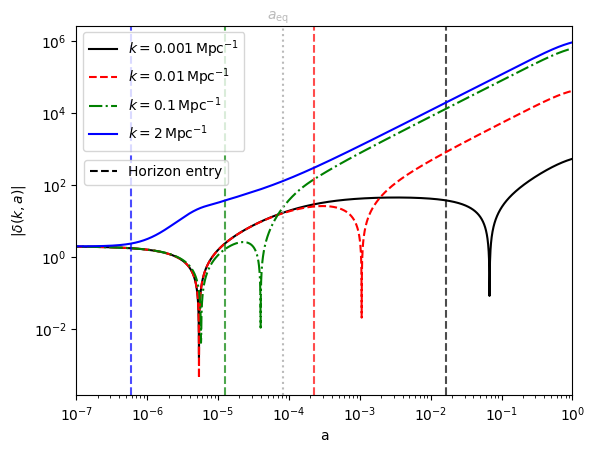

In [15]:
# From https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=6
styles = [
    ("black", "-"),
    ("red", "--"),
    ("green", "-."),
    ("blue", "-"),
]

fig, ax = plt.subplots()
for k, result, (color, ls) in zip(ks, results, styles):
    delta_m, theta_m, delta_gamma, theta_gamma, Phi = result.T
    ax.loglog(a, np.abs(delta_m), label=f"$k = {k} \\, \\mathrm{{Mpc}}^{{-1}}$", color=color, ls=ls)
    a_horizon_entry = pybolt.scale_factor_horizon_entry(c, k)
    ax.axvline(a_horizon_entry, alpha=0.7, ls="--", color=color)

ax.axvline(c.a_eq, c="darkgray", alpha=0.8, ls=":")
ax.text(c.a_eq/1.7, 4e6, r"$a_\mathrm{eq}$", c="darkgray", alpha=0.8)

ax.set_xlim([1e-7, 1])
ax.set_xlabel("a")
ax.set_ylabel(r"$|\delta(k, a)|$")
ax.legend()

line = matplotlib.lines.Line2D([], [], color='black', ls="--", label='Horizon entry')
legend = ax.legend()
ax.add_artist(legend)
ax.legend(handles=[line], bbox_to_anchor=(0.32, 0.55))

## The Matter Power Spectrum

Armed with the transfer functions, we can connect the initial power spectrum to the present-day one:

\begin{equation}
    P(k, a) = \Delta_i(k) \times \frac{2\pi^2}{k^3} \times T^2(k, a),
\end{equation}
where $T(k, a)$ is the matter transfer function (\textit{i.e.} its numerical evolution) and $\Delta_i(k)$ is the initial dimensionless power spectrum,
\begin{equation}
    \Delta_i(k) = A_s\left( \frac{k}{k_p}\right)^{n_s - 1}
\end{equation}

In [25]:
ks = np.logspace(-3, np.log10(3), 31)
a, results = solve_system_for_ks(ks)

Text(0, 0.5, '$P(k) \\, (\\mathrm{Mpc}^3)$')

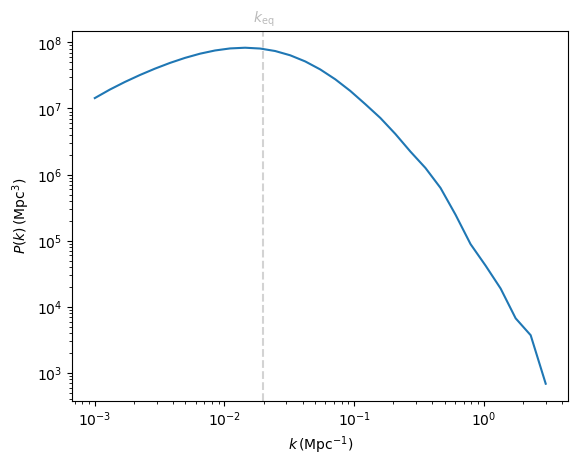

In [42]:
# Collecting power spectra
As = 2.1e-9
ns = 0.96
Pk = []
for result, k in zip(results, ks):
    delta_m, theta_m, delta_gamma, theta_gamma, Phi = result.T
    delta_m_now = delta_m[-1]
    Pk_at_k = As*(k/0.05)**(ns-1) * 2 * np.pi**2 / k**3 * delta_m_now**2
    Pk.append(Pk_at_k)

k_eq = H_curly(a_eq)
plt.axvline(k_eq, color="lightgray", ls="--")
plt.text(k_eq/1.2, 2e8, r"$k_\mathrm{eq}$", c="darkgray", alpha=0.8)
plt.loglog(ks, Pk)
plt.xlabel(r"$k \, (\mathrm{Mpc}^{-1})$")
plt.ylabel(r"$P(k) \, (\mathrm{Mpc}^3)$")